In [1]:
%matplotlib inline


Glass brain plotting in nilearn
===============================

See `plotting` for more plotting functionalities.



Retrieve data from Internet
---------------------------



In [2]:
from nilearn import datasets

localizer_dataset = datasets.fetch_localizer_button_task()
localizer_tmap_filename = localizer_dataset.tmaps[0]

Glass brain plotting: whole brain sagittal cuts
-----------------------------------------------



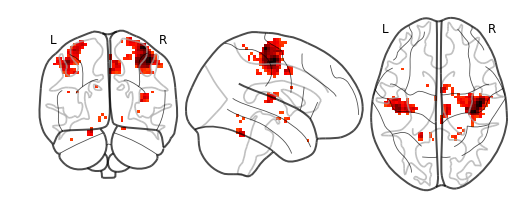

In [3]:
from nilearn import plotting

plotting.plot_glass_brain(localizer_tmap_filename, threshold=3)

Glass brain plotting: black backgrond
-------------------------------------
On a black background (option "black_bg"), and with only the x and
the z view (option "display_mode").



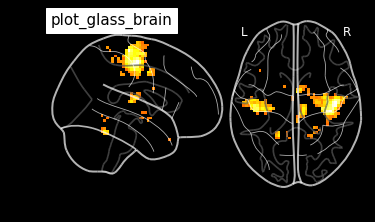

In [4]:
plotting.plot_glass_brain(
    localizer_tmap_filename, title='plot_glass_brain',
    black_bg=True, display_mode='xz', threshold=3)

Glass brain plotting: Hemispheric sagittal cuts
-----------------------------------------------



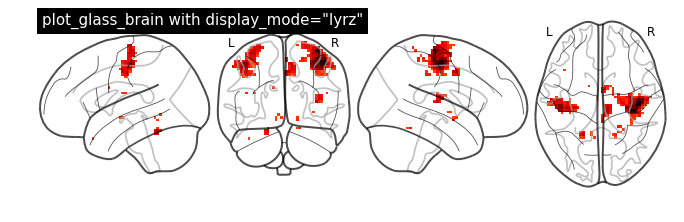

In [5]:
plotting.plot_glass_brain(localizer_tmap_filename,
                          title='plot_glass_brain with display_mode="lyrz"',
                          display_mode='lyrz', threshold=3)

plotting.show()


Glass brain plotting in nilearn (all options)
=============================================

First part of this example goes through different options of the
:func:`nilearn.plotting.plot_glass_brain` function (including plotting
negative values).

Second part, goes through same options but selected of the same glass brain
function but plotting is seen with contours.

See `plotting` for more plotting functionalities and
`Section 4.3 <display_modules>` for more details about display objects
in Nilearn.

Also, see :func:`nilearn.datasets.fetch_localizer_button_task` for details
about the plotting data and its experiments.



Retrieve the data
------------------

Nilearn comes with set of functions that download public data from Internet

Let us first see where the data will be downloded and stored on our disk:




In [6]:
from nilearn import datasets
print('Datasets shipped with nilearn are stored in: %r' % datasets.get_data_dirs())

Datasets shipped with nilearn are stored in: ['/home/line/nilearn_data']


Let us now retrieve a motor task contrast maps corresponding to second subject
from a localizer experiment



In [7]:
tmap_filenames = datasets.fetch_localizer_button_task()['tmaps']
print(tmap_filenames)

['/home/line/nilearn_data/brainomics_localizer/brainomics_data/S02/t_map_left_auditory_&_visual_click_vs_right_auditory&visual_click.nii.gz']


tmap_filenames is returned as a list. We need to take first one



In [8]:
tmap_filename = tmap_filenames[0]

Demo glass brain plotting
--------------------------



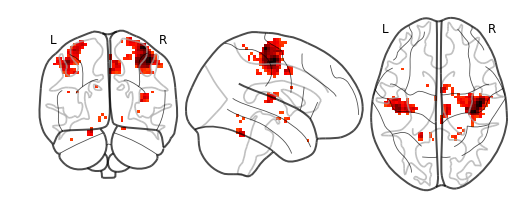

In [9]:
from nilearn import plotting

# Whole brain sagittal cuts and map is thresholded at 3
plotting.plot_glass_brain(tmap_filename, threshold=3)

With a colorbar



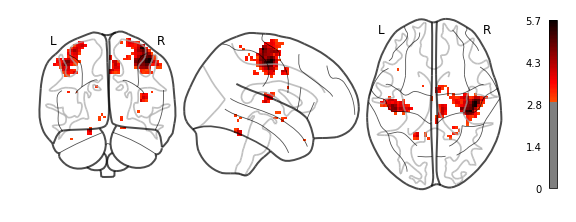

In [10]:
plotting.plot_glass_brain(tmap_filename, threshold=3, colorbar=True)

Black background, and only the (x, z) cuts



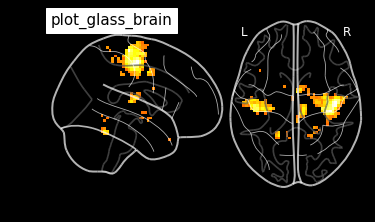

In [11]:
plotting.plot_glass_brain(tmap_filename, title='plot_glass_brain',
                          black_bg=True, display_mode='xz', threshold=3)

Plotting the sign of the activation with plot_abs to False



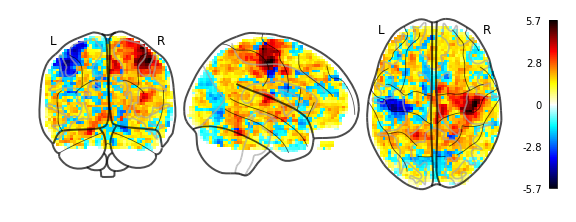

In [12]:
plotting.plot_glass_brain(tmap_filename, threshold=0, colorbar=True,
                          plot_abs=False)

The sign of the activation and a colorbar



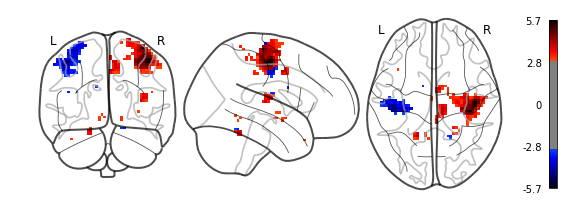

In [13]:
plotting.plot_glass_brain(tmap_filename, threshold=3,
                          colorbar=True, plot_abs=False)

Different projections for the left and right hemispheres
---------------------------------------------------------

Hemispheric sagittal cuts



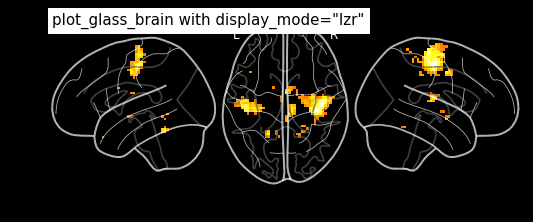

In [14]:
plotting.plot_glass_brain(tmap_filename,
                          title='plot_glass_brain with display_mode="lzr"',
                          black_bg=True, display_mode='lzr', threshold=3)

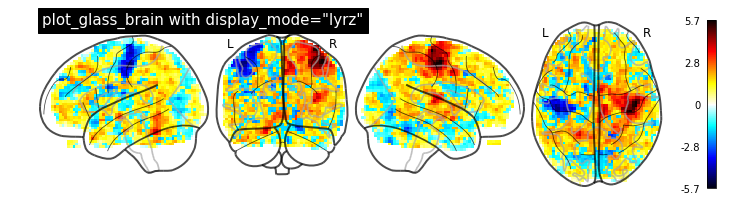

In [15]:
plotting.plot_glass_brain(tmap_filename, threshold=0, colorbar=True,
                          title='plot_glass_brain with display_mode="lyrz"',
                          plot_abs=False, display_mode='lyrz')

Demo glass brain plotting with contours and with fillings
---------------------------------------------------------
To plot maps with contours, we call the plotting function into variable from
which we can use specific display features which are inherited automatically.
In this case, we focus on using add_contours
First, we initialize the plotting function into "display" and first
argument set to None since we want an empty glass brain to plotting the
statistical maps with "add_contours"



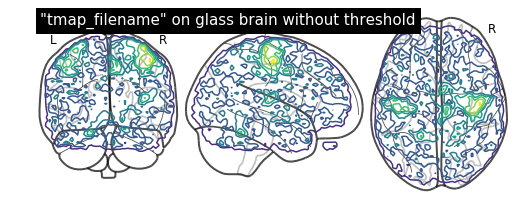

In [16]:
display = plotting.plot_glass_brain(None)
# Here, we project statistical maps
display.add_contours(tmap_filename)
# and a title
display.title('"tmap_filename" on glass brain without threshold')

Plotting with `filled=True` implies contours with fillings. Here, we are not
specifying levels



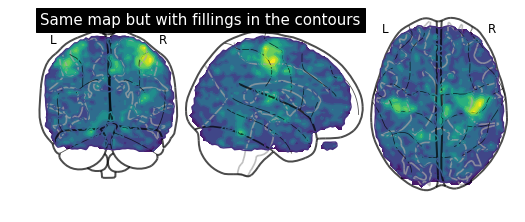

In [17]:
display = plotting.plot_glass_brain(None)
# Here, we project statistical maps with filled=True
display.add_contours(tmap_filename, filled=True)
# and a title
display.title('Same map but with fillings in the contours')

Here, we input specific level (cut-off) in the statistical map. In other way,
we are thresholding our statistical map



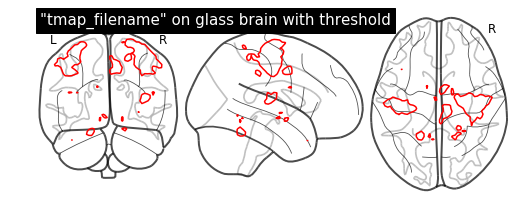

In [18]:
# Here, we set the threshold using parameter called `levels` with value given
# in a list and choosing color to Red.
display = plotting.plot_glass_brain(None)
display.add_contours(tmap_filename, levels=[3.], colors='r')
display.title('"tmap_filename" on glass brain with threshold')

Plotting with same demonstration but inlcudes now filled=True



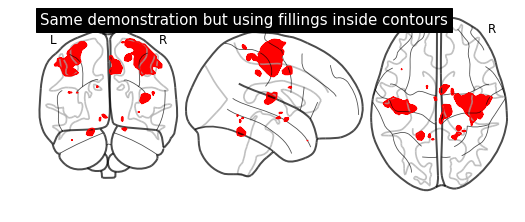

In [19]:
display = plotting.plot_glass_brain(None)
display.add_contours(tmap_filename, filled=True, levels=[3.], colors='r')
display.title('Same demonstration but using fillings inside contours')

Plotting with black background, `black_bg` should be set with
`plot_glass_brain`



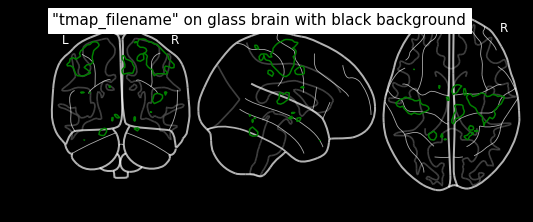

In [20]:
# We can set black background using black_bg=True
display = plotting.plot_glass_brain(None, black_bg=True)
display.add_contours(tmap_filename, levels=[3.], colors='g')
display.title('"tmap_filename" on glass brain with black background')

Black background plotting with filled in contours



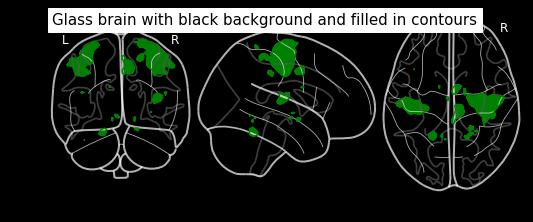

In [21]:
display = plotting.plot_glass_brain(None, black_bg=True)
display.add_contours(tmap_filename, filled=True, levels=[3.], colors='g')
display.title('Glass brain with black background and filled in contours')

Display contour projections in both hemispheres
-------------------------------------------------
Key argument to vary here is `display_mode` for hemispheric plotting



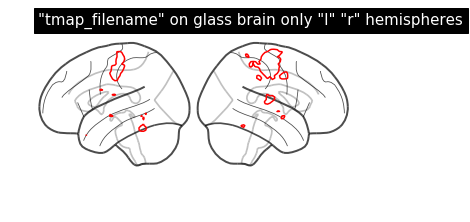

In [22]:
# Now, display_mode is chosen as 'lr' for both hemispheric plots
display = plotting.plot_glass_brain(None, display_mode='lr')
display.add_contours(tmap_filename, levels=[3.], colors='r')
display.title('"tmap_filename" on glass brain only "l" "r" hemispheres')

Filled contours in both hemispheric plotting, just by adding filled=True



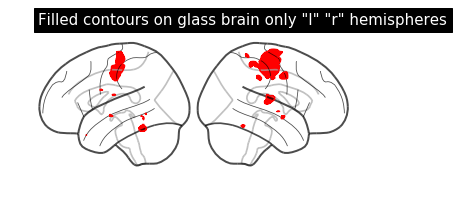

In [23]:
display = plotting.plot_glass_brain(None, display_mode='lr')
display.add_contours(tmap_filename, filled=True, levels=[3.], colors='r')
display.title('Filled contours on glass brain only "l" "r" hemispheres')

With positive and negative sign of activations with `plot_abs` in
`plot_glass_brain`



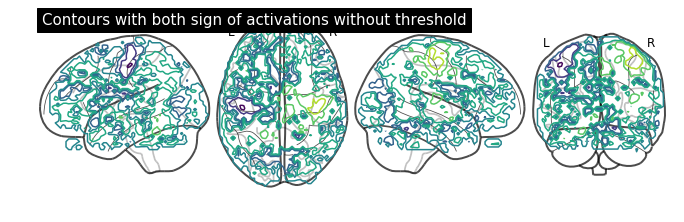

In [24]:
# By default parameter `plot_abs` is True and sign of activations can be
# displayed by changing `plot_abs` to False
display = plotting.plot_glass_brain(None, plot_abs=False, display_mode='lzry')
display.add_contours(tmap_filename)
display.title("Contours with both sign of activations without threshold")

Now, adding just filled=True to get positive and negative sign activations
with fillings in the contours



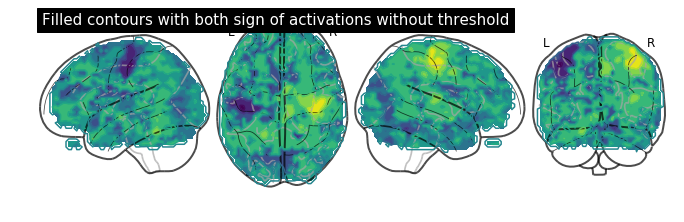

In [25]:
display = plotting.plot_glass_brain(None, plot_abs=False, display_mode='lzry')
display.add_contours(tmap_filename, filled=True)
display.title("Filled contours with both sign of activations without threshold")

Displaying both signs (positive and negative) of activations with threshold
meaning thresholding by adding an argument `levels` in add_contours.



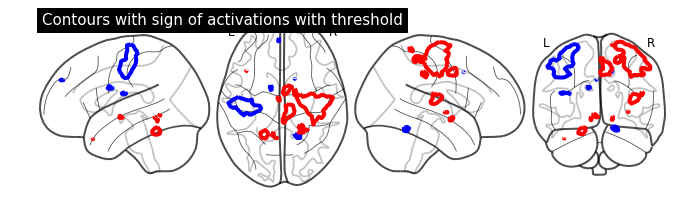

In [26]:
import numpy as np
display = plotting.plot_glass_brain(None, plot_abs=False, display_mode='lzry')

# In add_contours,
# we give two values through the argument `levels` which corresponds to the
# thresholds of the contour we want to draw: One is positive and the other one
# is negative. We give a list of `colors` as argument to associate a different
# color to each contour. Additionally, we also choose to plot contours with
# thick line widths, For linewidths one value would be enough so that same
# value is used for both contours.
display.add_contours(tmap_filename, levels=[-2.8, 3.], colors=['b', 'r'],
                     linewidths=4.)
display.title('Contours with sign of activations with threshold')

Same display demonstration as above but just adding filled=True to get
fillings inside the contours.



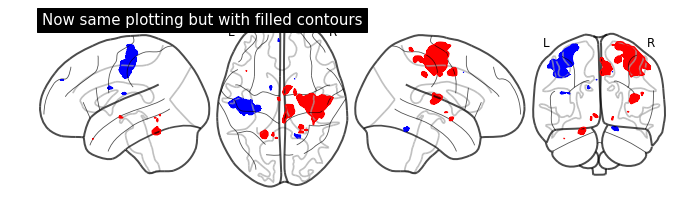

In [27]:
# Unlike in previous plot, here we specify each sign at a time. We call negative
# values display first followed by positive values display.

# First, we fetch our display object with same parametes used as above
display = plotting.plot_glass_brain(None, plot_abs=False, display_mode='lzry')

# Second, we plot negative sign of activation with levels given as negative
# activation value in a list. Upper bound should be kept to -infinity
display.add_contours(tmap_filename, filled=True, levels=[-np.inf, -2.8],
                     colors='b')
# Next, within same plotting object we plot positive sign of activation
display.add_contours(tmap_filename, filled=True, levels=[3.], colors='r')
display.title('Now same plotting but with filled contours')

# Finally, displaying them
plotting.show()


More plotting tools from nilearn
================================

In this example, we demonstrate how to use plotting options from
nilearn essential in visualizing brain image analysis results.

We emphasize the use of parameters such as `display_mode` and `cut_coords`
with plotting function :func:`nilearn.plotting.plot_stat_map`. Also,
we show how to use various features such as `add_edges`, `add_contours`,
`add_markers` essential in visualizing regions of interest images or
mask images overlaying on subject specific anatomical/EPI image.
The display features shown here are inherited from the
:class:`nilearn.plotting.displays.OrthoSlicer` class.

The parameter `display_mode` is used to draw brain slices along given
specific directions, where directions can be one of 'ortho',
'x', 'y', 'z', 'xy', 'xz', 'yz'. whereas parameter `cut_coords`
is used to specify a limited number of slices to visualize along given
specific slice direction. The parameter `cut_coords` can also be used
to draw the specific cuts in the slices by giving its particular
coordinates in MNI space accordingly with particular slice direction.
This helps us point to the activation specific location of the brain slices.

See `plotting` for more details.



First, we retrieve data from nilearn provided (general-purpose) datasets
-------------------------------------------------------------------------



In [28]:
from nilearn import datasets

# haxby dataset to have anatomical image, EPI images and masks
haxby_dataset = datasets.fetch_haxby()
haxby_anat_filename = haxby_dataset.anat[0]
haxby_mask_filename = haxby_dataset.mask_vt[0]
haxby_func_filename = haxby_dataset.func[0]

# localizer dataset to have contrast maps
localizer_dataset = datasets.fetch_localizer_button_task(get_anats=True)
localizer_anat_filename = localizer_dataset.anats[0]
localizer_tmap_filename = localizer_dataset.tmaps[0]


Dataset created in /home/line/nilearn_data/haxby2001



Downloaded 2969 of 2969 bytes (100.0%,    0.0s remaining) ...done. (1 seconds, 0 min)


Downloaded 408 of 408 bytes (100.0%,    0.0s remaining) ...done. (0 seconds, 0 min)


Downloaded 291168628 of 291168628 bytes (100.0%,    0.0s remaining) ...done. (27 seconds, 0 min)
Extracting data from /home/line/nilearn_data/haxby2001/f33ff337e914bf7fded743c7107979f9/subj2-2010.01.14.tar.gz..... done.


Now, we show from here how to visualize the retrieved datasets using plotting
tools from nilearn.



In [29]:
from nilearn import plotting

Visualizing in - 'sagittal', 'coronal' and 'axial' with given coordinates
-------------------------------------------------------------------------
The first argument is a path to the filename of a constrast map,
optional argument `display_mode` is given as string 'ortho' to visualize
the map in three specific directions xyz and the optional `cut_coords`
argument, is here a list of integers denotes coordinates of each slice
in the order [x, y, z]. By default the `colorbar` argument is set to True
in plot_stat_map.



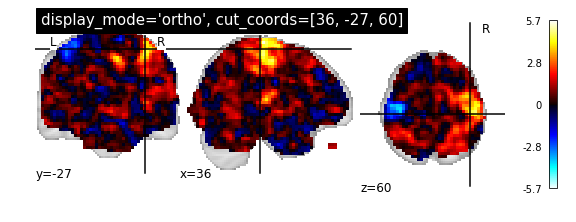

In [30]:
plotting.plot_stat_map(localizer_tmap_filename, display_mode='ortho',
                       cut_coords=[36, -27, 60],
                       title="display_mode='ortho', cut_coords=[36, -27, 60]")

Visualizing in - single view 'axial' with number of cuts=5
-----------------------------------------------------------
In this type of visualization, the `display_mode` argument is given as
string 'z' for axial direction and `cut_coords` as integer 5 without a
list implies that number of cuts in the slices should be maximum of 5.
The coordinates to cut the slices are selected automatically



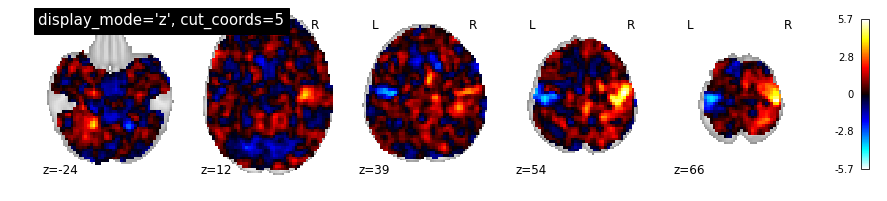

In [31]:
plotting.plot_stat_map(localizer_tmap_filename, display_mode='z', cut_coords=5,
                       title="display_mode='z', cut_coords=5")

Visualizing in - single view 'sagittal' with only two slices
-------------------------------------------------------------
In this type, `display_mode` should be given as string 'x' for sagittal
view and coordinates should be given as integers in a list



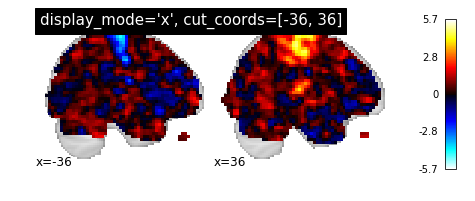

In [32]:
plotting.plot_stat_map(localizer_tmap_filename, display_mode='x',
                       cut_coords=[-36, 36],
                       title="display_mode='x', cut_coords=[-36, 36]")

Visualizing in - 'coronal' view with single cut
------------------------------------------------
For coronal view, `display_mode` is given as string 'y' and `cut_coords`
as integer 1 not as a list for single cut. The coordinates are selected
automatically



/home/line/anaconda2/envs/neuro/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


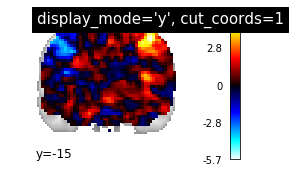

In [33]:
plotting.plot_stat_map(localizer_tmap_filename, display_mode='y', cut_coords=1,
                       title="display_mode='y', cut_coords=1")

Visualizing without a colorbar on the right side
-------------------------------------------------
The argument `colorbar` should be given as False to show plots without
a colorbar on the right side.



/home/line/anaconda2/envs/neuro/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


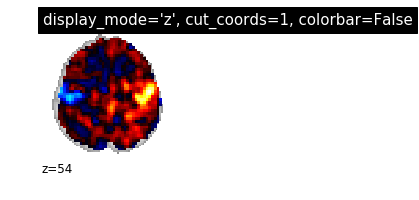

In [34]:
plotting.plot_stat_map(localizer_tmap_filename, display_mode='z',
                       cut_coords=1, colorbar=False,
                       title="display_mode='z', cut_coords=1, colorbar=False")

Visualize in - two views 'sagittal' and 'axial' with given coordinates
-------------------------------------------------------------------------
argument display_mode='xz' where 'x' for sagittal and 'z' for axial view.
argument `cut_coords` should match with input number of views therefore two
integers should be given in a list to select the slices to be displayed



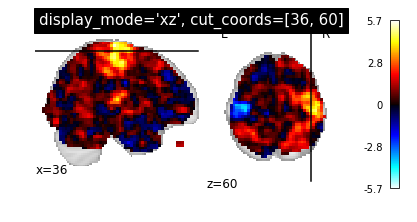

In [35]:
plotting.plot_stat_map(localizer_tmap_filename, display_mode='xz',
                       cut_coords=[36, 60],
                       title="display_mode='xz', cut_coords=[36, 60]")

Changing the views to 'coronal', 'sagittal' views with coordinates
-------------------------------------------------------------------
display_mode='yx' for coronal and saggital view and coordinates will be
assigned in the order of direction as [x, y, z]



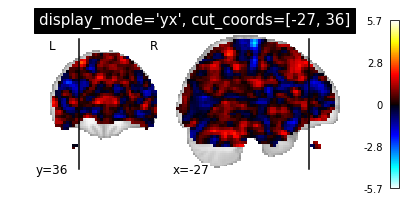

In [36]:
plotting.plot_stat_map(localizer_tmap_filename, display_mode='yx',
                       cut_coords=[-27, 36],
                       title="display_mode='yx', cut_coords=[-27, 36]")

Now, views are changed to 'coronal' and 'axial' views with coordinates
-----------------------------------------------------------------------



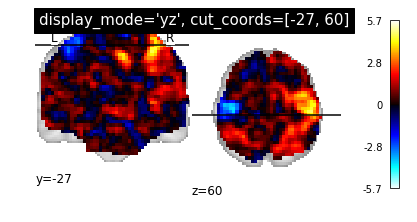

In [37]:
plotting.plot_stat_map(localizer_tmap_filename, display_mode='yz',
                       cut_coords=[-27, 60],
                       title="display_mode='yz', cut_coords=[-27, 60]")

Demonstrating various display features
---------------------------------------
In second part, we switch to demonstrating various features add_* from
nilearn where each specific feature will be helpful in projecting brain
imaging results for further interpretation.



In [38]:
# Import image processing tool for basic processing of functional brain image
from nilearn import image

# Compute voxel-wise mean functional image across time dimension. Now we have
# functional image in 3D assigned in mean_haxby_img
mean_haxby_img = image.mean_img(haxby_func_filename)

Showing how to use `add_edges`
------------------------------
Now let us see how to use `add_edges`, method useful for checking
coregistration by overlaying anatomical image as edges (red) on top of
mean functional image (background), both being of same subject.



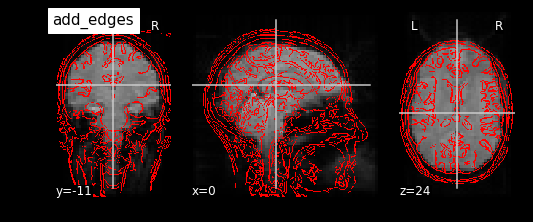

In [39]:
# First, we call the `plot_anat` plotting function, with a background image
# as first argument, in this case the mean fMRI image.

display = plotting.plot_anat(mean_haxby_img, title="add_edges")

# We are now able to use add_edges method inherited in plotting object named as
# display. First argument - anatomical image  and by default edges will be
# displayed as red 'r', to choose different colors green 'g' and  blue 'b'.
display.add_edges(haxby_anat_filename)

How to use `add_contours`
-------------------------
Plotting outline of the mask (red) on top of the mean EPI image with
`add_contours`. This method is useful for region specific interpretation
of brain images



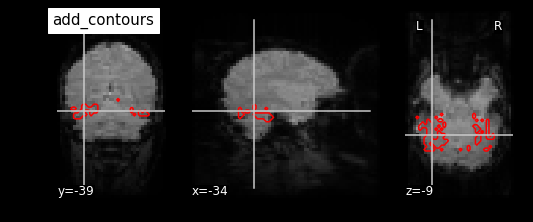

In [40]:
# As seen before, we call the `plot_anat` function with a background image
# as first argument, in this case again the mean fMRI image and argument
# `cut_coords` as list for manual cut with coordinates pointing at masked
# brain regions
display = plotting.plot_anat(mean_haxby_img, title="add_contours",
                             cut_coords=[-34, -39, -9])
# Now use `add_contours` in display object with the path to a mask image from
# the Haxby dataset as first argument and argument `levels` given as list
# of values to select particular level in the contour to display and argument
# `colors` specified as red 'r' to see edges as red in color.
# See help on matplotlib.pyplot.contour to use more options with this method
display.add_contours(haxby_mask_filename, levels=[0.5], colors='r')

Plotting outline of the mask (blue) with color fillings using same method
`add_contours`.



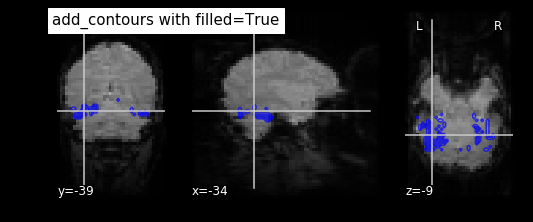

In [41]:
display = plotting.plot_anat(mean_haxby_img,
                             title="add_contours with filled=True",
                             cut_coords=[-34, -39, -9])

# By default, no color fillings will be shown using `add_contours`. To see
# contours with color fillings use argument filled=True. contour colors are
# changed to blue 'b' with alpha=0.7 sets the transparency of color fillings.
# See help on matplotlib.pyplot.contourf to use more options given that filled
# should be True
display.add_contours(haxby_mask_filename, filled=True, alpha=0.7,
                     levels=[0.5], colors='b')

Plotting seeds using `add_markers`
----------------------------------
Plotting seed regions of interest as spheres using new feature `add_markers`
with MNI coordinates of interest.



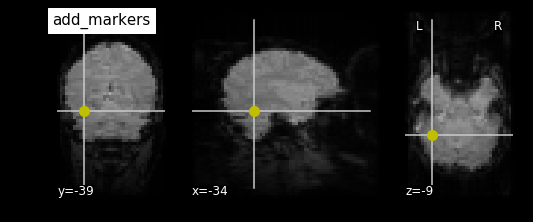

In [42]:
display = plotting.plot_anat(mean_haxby_img, title="add_markers",
                             cut_coords=[-34, -39, -9])

# Coordinates of seed regions should be specified in first argument and second
# argument `marker_color` denotes color of the sphere in this case yellow 'y'
# and third argument `marker_size` denotes size of the sphere
coords = [(-34, -39, -9)]
display.add_markers(coords, marker_color='y', marker_size=100)

Finally, saving the plots to file with two different ways



In [43]:
# Contrast maps plotted with function `plot_stat_map` can be saved using an
# inbuilt parameter output_file as filename + .extension as string. Valid
# extensions are .png, .pdf, .svg
plotting.plot_stat_map(localizer_tmap_filename,
                       title='Using plot_stat_map output_file',
                       output_file='plot_stat_map.png')

Another way of saving plots is using 'savefig' option from display object



In [44]:
display = plotting.plot_stat_map(localizer_tmap_filename,
                                 title='Using display savefig')
display.savefig('plot_stat_map_from_display.png')
# In non-interactive settings make sure you close your displays
display.close()

plotting.show()


Making a surface plot of a 3D statistical map
=============================================

project a 3D statistical map onto a cortical mesh using
:func:`nilearn.surface.vol_to_surf`. Display a surface plot of the projected
map using :func:`nilearn.plotting.plot_surf_stat_map`.

NOTE: Example needs matplotlib version higher than 1.3.1.




Get a statistical map
---------------------



In [45]:
from nilearn import datasets

localizer_dataset = datasets.fetch_localizer_button_task()
localizer_tmap = localizer_dataset.tmaps[0]

Get a cortical mesh
-------------------



In [46]:
fsaverage = datasets.fetch_surf_fsaverage5()

Sample the 3D data around each node of the mesh
-----------------------------------------------



In [47]:
from nilearn import surface

texture = surface.vol_to_surf(localizer_tmap, fsaverage.pial_right)

Plot the result
---------------



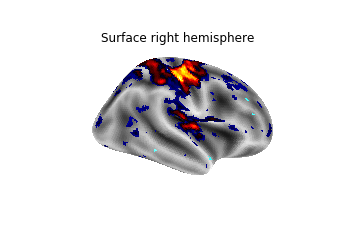

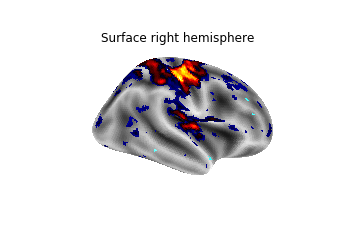

In [48]:
from nilearn import plotting

plotting.plot_surf_stat_map(fsaverage.infl_right, texture, hemi='right',
                            title='Surface right hemisphere',
                            threshold=1., bg_map=fsaverage.sulc_right,
                            cmap='cold_hot')

Plot 3D image for comparison
----------------------------



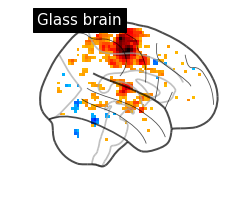

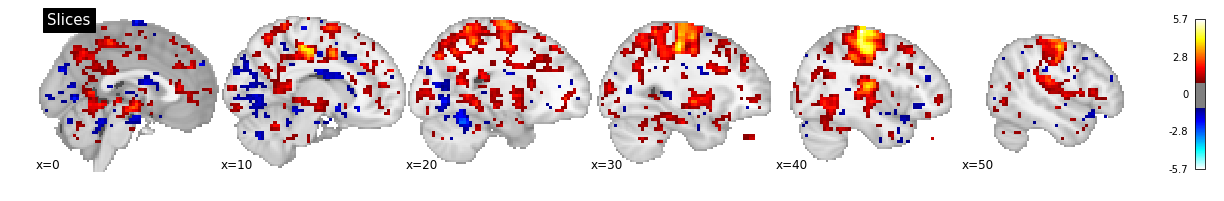

In [49]:
plotting.plot_glass_brain(localizer_tmap, display_mode='r', plot_abs=False,
                          title='Glass brain', threshold=2.)

plotting.plot_stat_map(localizer_tmap, display_mode='x', threshold=1.,
                       cut_coords=range(0, 51, 10), title='Slices')

plotting.show()